In [94]:
print('Hello World. Lets start our journey towards Data Scien & AI')

Hello World. Lets start our journey towards Data Scien & AI


In [95]:
# Import the pandas library
import pandas as pd

# Accessing the Downloaded .csv Dataset File

In [96]:
df = pd.read_csv('online_retail.csv')

In [97]:
# Step 1: Install the KaggleHub library
# The '!' command runs a shell command in Google Colab/Jupyter.
!pip install kagglehub

# Step 2: Import the necessary libraries
import kagglehub

import os # This library helps work with file paths

# The following method ensures that you will always work with the latest version of the dataset.

In [98]:
# Step 3: Download the dataset
# This will download the files to a local folder and return the path.
# In Google Colab, it will ask for authentication the first time.
print("Downloading the dataset...")

In [99]:
# Tells the kagglehub library to find the dataset identified by "pavansubhasht/ibm-hr-analytics-attrition-dataset"
# Saves the files to a temporary folder on the computer and then stores the location (the path) of that folder in the variable called 'path'
path = kagglehub.dataset_download("ulrikthygepedersen/online-retail-dataset")
print(f"Dataset downloaded to: {path}")

Dataset downloaded to: C:\Users\manwarsadat\.cache\kagglehub\datasets\ulrikthygepedersen\online-retail-dataset\versions\2


In [100]:
file_name = 'online_retail.csv'

In [101]:
file_path = r"C:\Users\manwarsadat\.cache\kagglehub\datasets\ulrikthygepedersen\online-retail-dataset\versions\2\online_retail.csv"

In [102]:
df = pd.read_csv(file_path, encoding='latin1')

In [103]:
# Step 5: Display the first 5 rows to confirm it's working
print("\nDataset loaded successfully!")
print(df.head())



Dataset loaded successfully!
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# Data Preprocessing

## Initial Analysis On Our Dataset

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [105]:
df.shape

(541909, 8)

In [106]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [88]:
#Our dataset has 541909 rows and 8 columns.

#Our dataset has 1 integer, 2 floats and 5 objects data types.

#There are 1454 and 135080 missing values in Description and CustomerID columns respectively.

# EDA : Exploratory Data Analysis

## Dealing with Missing values

In [107]:
#  Removing NaN's in Customer ID
print("Shape of data before removing NaN's CustomerID",df.shape)
df.dropna(subset="CustomerID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",df.shape)

Shape of data before removing NaN's CustomerID (541909, 8)
Shape of data after removing NaN's CustomerID (406829, 8)


In [108]:
print("Missing values in each column after cleaning customerID :\n",df.isnull().sum())

Missing values in each column after cleaning customerID :
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Removing cancelled products from invoice

In [109]:
#using one's compliment operator (~) we can unselect all the Invoice column which doesnt contain "C".
df = df[~df.InvoiceNo.str.contains('C',na=False)]
print("Dataset is free from cancelled products information")

Dataset is free from cancelled products information


## Removing Duplicates

In [110]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",df.duplicated().sum())
df = df.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",df.duplicated().sum())


Number of duplicates before cleaning: 5192
Number of duplicates after cleaning: 0


## Checking for negative value

In [47]:
print("Negative value in Quantity is:",(df.Quantity<0).sum())
print("Negative value in UnitPrice is:",(df.UnitPrice<0).sum())

Negative value in Quantity is: 0
Negative value in UnitPrice is: 0


## Cleaning Outliers

In [111]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

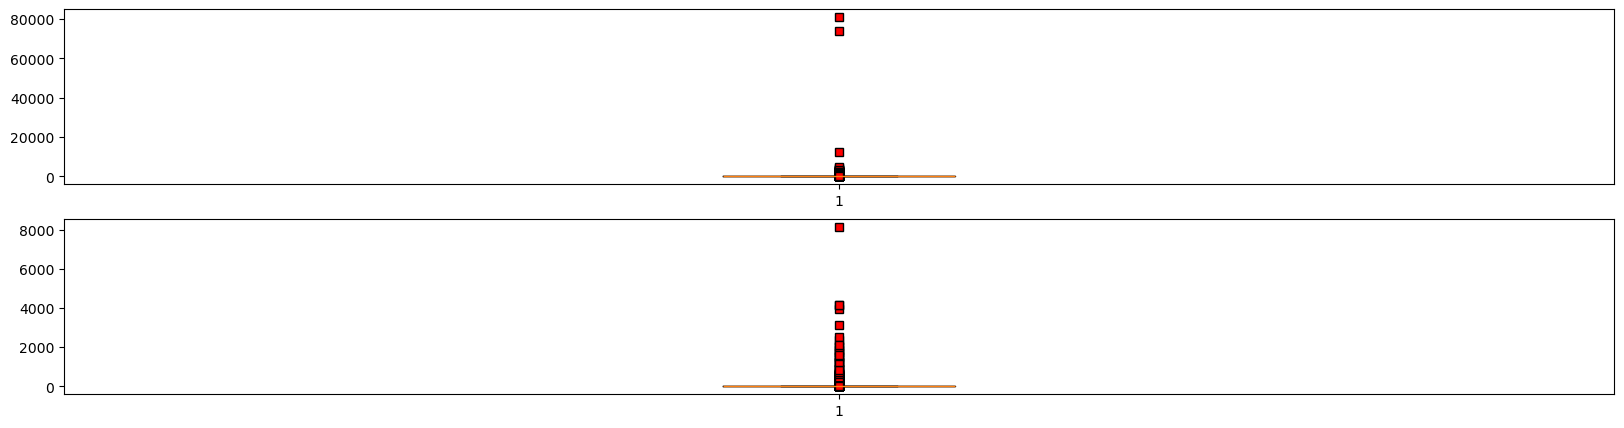

In [112]:
# Observing them before removing outliers.
import matplotlib.pyplot as plt
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","UnitPrice"]
for i in range(0,2):
    ax[i].boxplot(df[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

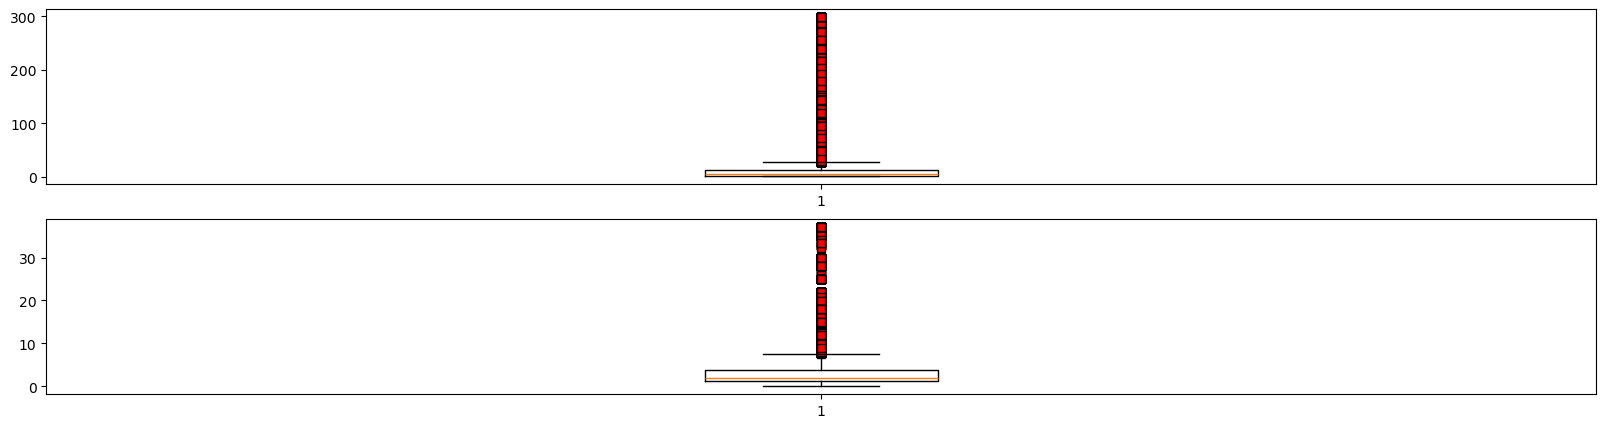

In [113]:
# Applying the functions for remove the outlier.
df['Quantity'] = df['Quantity'].astype(float)
df['UnitPrice'] = df['UnitPrice'].astype(float)
replace_with_threshold(df, "Quantity")
replace_with_threshold(df, "UnitPrice")
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(df[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

# Feature Engineering

In [114]:
#Creating new feature Revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [115]:
#Creating Features for RFM Model
#Changing data type to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [116]:
print("Max date :",df["InvoiceDate"].max())
print("Min date :",df["InvoiceDate"].min())

Max date : 2011-12-09 12:50:00
Min date : 2010-12-01 08:26:00


In [117]:
#RFM Featuring

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
import datetime as dt
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM features with subset of customerID
RFM = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                 'InvoiceNo': lambda x: x.nunique(), 
                                                 "Revenue": lambda x: x.sum()})
                                
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Revenue': 'Monetary'}, inplace=True)



In [118]:
#Recency score based on quantiles
#Assigning labels from 1-5,  1 being the lowest recency
RFM["Recency_score"] = pd.qcut(RFM['Recency'], 5, labels = [5, 4, 3, 2, 1])

#Frequency score
RFM["Frequency_score"] = pd.qcut(RFM['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])

In [119]:
RFM["rfm_segment"] = RFM['Recency_score'].astype(str) + RFM['Frequency_score'].astype(str)

In [120]:
RFM

,Recency,Frequency,Monetary,Recency_score,Frequency_score,rfm_segment
CustomerID,,,,,,
12346.0,325,1,310.44,1,1,11
12347.0,2,7,4310.00,5,5,55
12348.0,75,4,1770.78,2,4,24
12349.0,18,1,1491.72,4,1,41
12350.0,310,1,331.46,1,1,11
...,...,...,...,...,...,...
18280.0,277,1,180.60,1,2,12
18281.0,180,1,80.82,1,2,12
18282.0,7,2,178.05,5,3,53
